In [20]:
from math import pi, asin, degrees
y = [-1 + 0.01 + 0.01 * i for i in range(199)]
n1 = 1
n21 = 1.331
n22 = 1.343

def phi_1(y, n1, n2):
    return 4 * asin(n1 * y / n2) - 2 * asin(y)

def phi_2(y, n1, n2):
    return pi - 6 * asin(n1 * y / n2) + 2 * asin(y)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

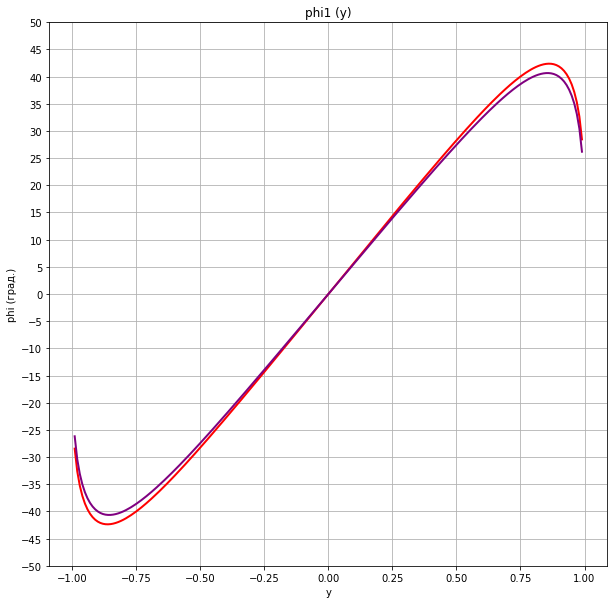

In [5]:
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)
ax1 = fig1.add_subplot(111)

ph1_red = [degrees(phi_1(i, n1, n21)) for i in y]
ph1_purple = [degrees(phi_1(i, n1, n22)) for i in y]

ax1.plot(y, ph1_red, color="red", linewidth=2)
ax1.plot(y, ph1_purple, color="purple", linewidth=2)
ax1.grid(axis="x")
ax1.grid(axis="y")
ax1.set_yticks(np.arange(-50, 51, 5))
ax1.set_ylabel("phi (град.)")
ax1.set_xlabel("y")
ax1.set_title("phi1 (y)")
plt.show()

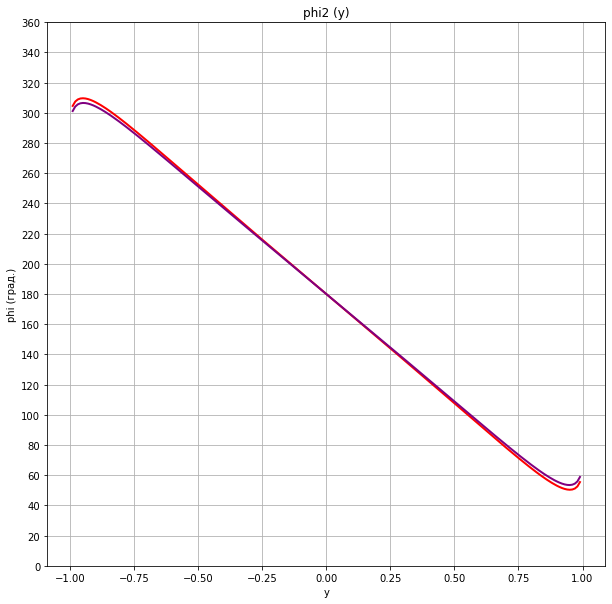

In [8]:
fig2 = plt.figure()
fig2.set_figheight(10)
fig2.set_figwidth(10)
ax2 = fig2.add_subplot(111)

ph2_red = [degrees(phi_2(i, n1, n21)) for i in y]
ph2_purple = [degrees(phi_2(i, n1, n22)) for i in y]

ax2.plot(y, ph2_red, color="red", linewidth=2)
ax2.plot(y, ph2_purple, color="purple", linewidth=2)
ax2.grid(axis="x")
ax2.grid(axis="y")
ax2.set_yticks(np.arange(0, 361, 20))
ax2.set_ylabel("phi (град.)")
ax2.set_xlabel("y")
ax2.set_title("phi2 (y)")
plt.show()

In [9]:
print("Max phi1 для красного =", max(ph1_red), "градусов")
print("Max phi1 для фиолетового =", max(ph1_purple), "градусов")
print("Min phi2 для красного =", min(ph2_red), "градусов")
print("Min phi2 для фиолетового =", min(ph2_purple), "градусов")

Max phi1 для красного = 42.36886085211213 градусов
Max phi1 для фиолетового = 40.640737167183595 градусов
Min phi2 для красного = 50.36561284542731 градусов
Min phi2 для фиолетового = 53.481505318401744 градусов


In [29]:
from scipy.misc import derivative
from math import radians

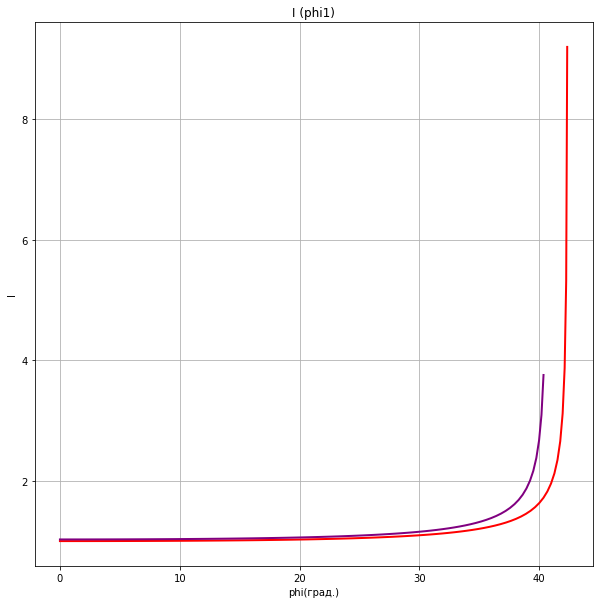

In [28]:
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)
ax1 = fig1.add_subplot(111)

def phi1_red(y):
    return 4 * asin(n1 * y / n21) - 2 * asin(y)

def phi1_purple(y):
    return 4 * asin(n1 * y / n22) - 2 * asin(y)

def phi2_red(y):
    return pi - 6 * asin(n1 * y / n21) + 2 * asin(y)

def phi2_purple(y):
    return pi - 6 * asin(n1 * y / n22) + 2 * asin(y)

y1 = np.arange(0, radians(max(ph1_red)) + 0.12, 0.01)
y2 = np.arange(0, radians(max(ph1_purple)) + 0.12, 0.01)

ph1_red2 = [degrees(phi1_red(i)) for i in y1]
ph1_purple2 = [degrees(phi1_purple(i)) for i in y2]
I1_red = [1 / derivative(phi1_red, i, dx=0.0001) for i in y1]
I1_purple = [1 / derivative(phi1_purple, i, dx=0.0001) for i in y2]

ax1.plot(ph1_red2, I1_red, color="red", linewidth=2)
ax1.plot(ph1_purple2, I1_purple,  color="purple", linewidth=2)
ax1.grid(axis="x")
ax1.grid(axis="y")
ax1.set_ylabel("I")
ax1.set_xlabel("phi(град.)")
ax1.set_title("I (phi1)")
plt.show()

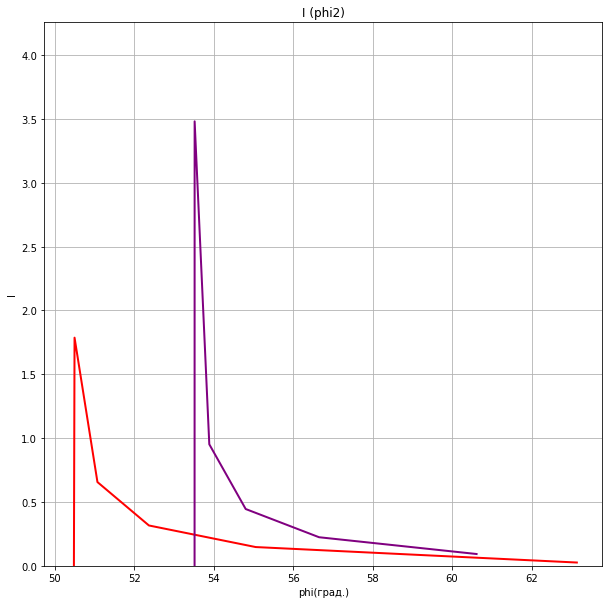

In [53]:
fig2 = plt.figure()
fig2.set_figheight(10)
fig2.set_figwidth(10)
ax2 = fig2.add_subplot(111)

y1 = np.arange(radians(min(ph2_red)), 1, 0.01)
y2 = np.arange(radians(min(ph2_purple)), 1, 0.01)

ph2_red2 = [degrees(phi2_red(i)) for i in y1]
ph2_purple2 = [degrees(phi2_purple(i)) for i in y2]
I2_red = [1 / derivative(phi2_red, i, dx=0.0001) for i in y1]
I2_purple = [1 / derivative(phi2_purple, i, dx=0.0001) for i in y2]

ax2.plot(ph2_red2, I2_red, color="red", linewidth=2)
ax2.plot(ph2_purple2, I2_purple,  color="purple", linewidth=2)
ax2.grid(axis="x")
ax2.set_ylim(bottom=0.)
ax2.grid(axis="y")
ax2.set_ylabel("I")
ax2.set_xlabel("phi(град.)")
ax2.set_title("I (phi2)")
plt.show()